# Scikit-learn Classification Algorithms

## Introduction

According to [Mitchell](http://www.cs.cmu.edu/~tom/mlbook.html), machine learning is ”concerned with the question of how to construct computer programs that automatically improve with experience.” [Machine learning](https://en.wikipedia.org/wiki/Machine_learning) is interdisciplinary in nature, and employs techniques from the fields of computer science, statistics, and artificial intelligence, among others. The main artifacts of machine learning research are algorithms which facilitate this automatic improvement from experience, algorithms which can be applied in such diverse fields as computer vision, artificial intelligence, and data mining.

[Classification](https://en.wikipedia.org/wiki/Statistical_classification) is concerned with building a model that separates data into distinct classes. This model is built by inputting a set of training data for which the classes are prelabeled in order for the algorithm to learn from. The model is then used by inputting a different dataset for which the classes are withheld, allowing the model to predict their class membership based on what it has learned from the training set. Well-known classification schemes include decision trees and support vector machines. As this type of algorithm requires explicit class labeling, classification is a form of [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning).

Scikit-learn is the _de facto_ official machine learning library in use in the Python ecosystem. As described on [its official website](http://scikit-learn.org/stable/), Scikit-learn is:

> * Simple and efficient tools for data mining and data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable - BSD license

![Scikit-learn](./img/plot_classifier_comparison.jpg)

This tutorial is meant to serve as a demonstration of several machine learning classifiers, and { is inspired by | references | incoporates techniques from } the following excellent works:

* Randal Olson's [An Example Machine Learning Notebook](http://nbviewer.ipython.org/github/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb)
* Analytics Vidhya's [Common Machine Learning Algorithms Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/09/full-cheatsheet-machine-learning-algorithms/)
* Scikit-learn's official [Cross-validation Documentation](http://scikit-learn.org/stable/modules/cross_validation.html)
* Scikit-learn's official [Iris Dataset Documentation](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
* Likely includes influence of the various referenced tutorials included in this [KDnuggets Python Machine Learning](http://www.kdnuggets.com/2015/11/seven-steps-machine-learning-python.html) article I recently wrote

We will use the well-known [Iris](https://archive.ics.uci.edu/ml/datasets/Iris) and [Digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits) datasets to build models with the following machine learning [classification](https://en.wikipedia.org/wiki/Statistical_classification) algorithms:

* [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)
* [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree)
* [Support Vector Machine](https://en.wikipedia.org/wiki/Support_vector_machine)
* [Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
* [k-nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
* [Random Forests](https://en.wikipedia.org/wiki/Random_forest)

We also use different strategies for evaluating models:

* [Separate testing and training datasets](https://en.wikipedia.org/wiki/Test_set)
* [k-fold Cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)

Some simple data investigation methods and tools will be undertaken as well, including:

* Plotting data with [Matplotlib](http://matplotlib.org/)
* Building and data via [Pandas](http://pandas.pydata.org/) dataframes
* Constructing and operating on multi-dimensional arrays and matrices with [Numpy](http://www.numpy.org/)

This tutorial is brief, non-verbose, and to the point. Please [alert me](https://twitter.com/mattmayo13) if you find inaccuracies. Also, if you find it at all useful, and believe it to be worth doing so, please feel free to share it far and wide.

## Investigating and Visualizing the Data

Investigating data is a principal component of machine learning tasks, and there are numerous methods for pursuing such investigation depending on what our goals are. There are numerous resources which devote more energy to data investigaion (such as Randal Olson's [An Example Machine Learning Notebook](http://nbviewer.ipython.org/github/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb)), and as this tutorial is focused on demonstrating various machine learning classifiers, as opposed to constructing end-to-end machine learning pipelines, we will devote comparatively less time to such tasks.

First we must import the necessary libraries (they must reside on your computer) and load the required dataset.  We will then have a quick look at the data structure using the Pandas library. Finally, we look at a few simple visualizations of the data, which are often suitable enough to gain very quick insight and understanding.

In [20]:
# Import pandas for building dataframes
import pandas as pd

# Import numpy
import numpy as np

# Import matplotlib for graphs, set inline
from matplotlib import pyplot as plt
%matplotlib inline

# Import datasets for use
from sklearn import datasets

# We will use the iris & digits datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

### Exploring the Iris Dataset

In [7]:
# Load iris dataset into a dataframe for exploration
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['class'] = iris.target

# Output head of iris dataframe for instance inspection
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
# Display a description of the iris dataset as summary
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


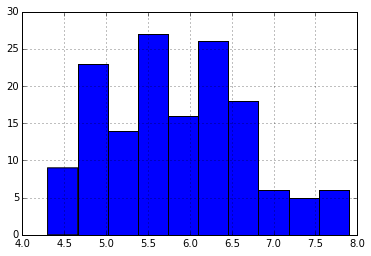

In [218]:
# Sepal length histogram
iris_df['sepal length (cm)'].hist()

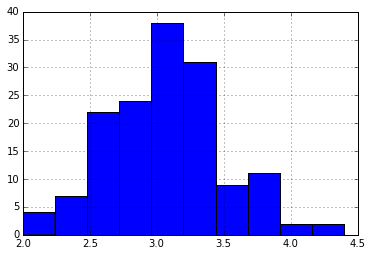

In [219]:
# Sepal width histogram
iris_df['sepal width (cm)'].hist()

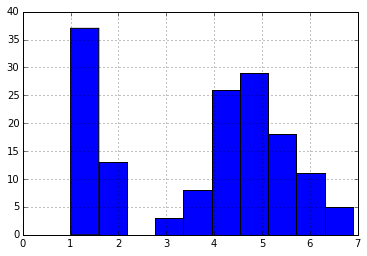

In [217]:
# Petal length histogram
iris_df['petal length (cm)'].hist()

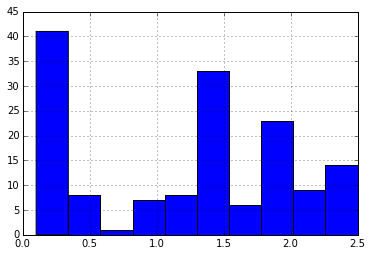

In [220]:
# Petal width histogram
iris_df['petal width (cm)'].hist()

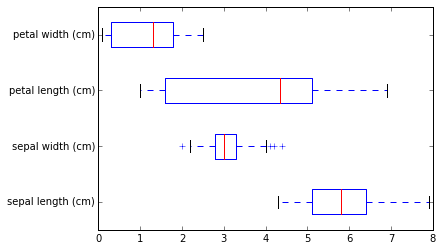

In [51]:
# Dataset boxplot
iris_df.plot(kind='box', vert=False)

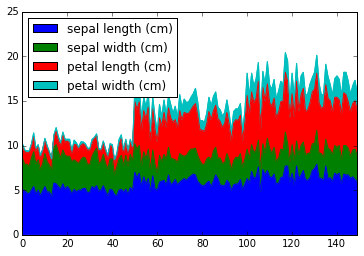

In [55]:
# Dataset area plot
iris_df.plot(kind='area')

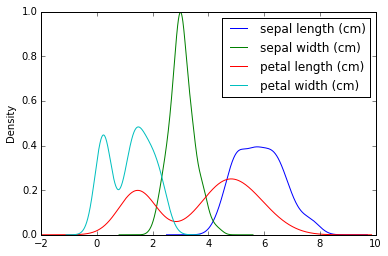

In [62]:
# Dataset density plot
iris_df.plot(kind='kde')

The following uses [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis), converting the dataset's variables into a set of principal components, which will then be plotted in both 2 and 3 dimensions.

This code has been taken in totality from Scikit-learn's official [Iris Dataset Documentation](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
).

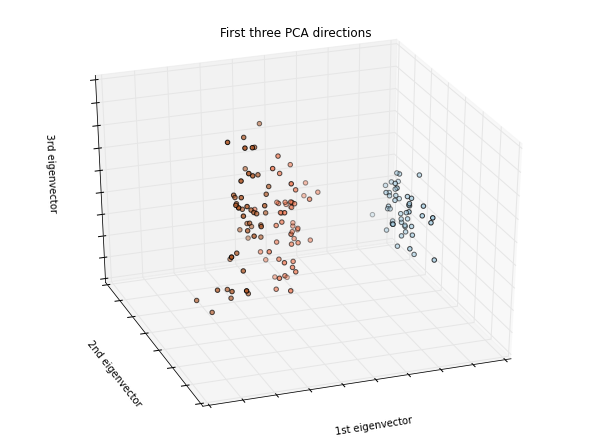

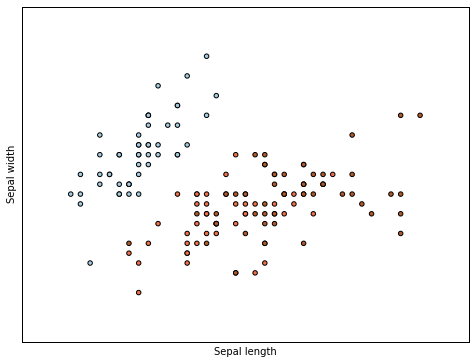

In [64]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# import some data to play with
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Exploring the Digits Dataset

_Note that much of the above exploration is not relevant or useful to the Digits dataset._

In [30]:
# Load digits dataset into a dataframe for exploration
digits_df = pd.DataFrame(digits.data)
digits_df['class'] = digits.target

# Output head of iris dataframe for instance inspection
digits_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,class
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


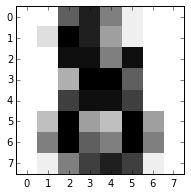

In [33]:
# Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## Preparing the Data

With some preliminary understanding of the dataset, we can move to preparing the data for analysis.

We must prepare the datasets we will use for testing (fitting) the algorithms. Since we already have the Iris dataset loaded, we will go on to setting our predictor and target appropriately, creating testing and training sets to use repeatedly moving forward.

### Preparing the Iris Dataset

In [39]:
# X and y are the predictor and target, respectively
X = iris.data
y = iris.target

# Number of samples in the iris dataset
n_sample = len(X)

# Split training/testing sets
np.random.seed(0)
order = np.random.permutation(n_sample)

X = X[order]
y = y[order].astype(np.float)

X_train = X[:.9 * n_sample]
y_train = y[:.9 * n_sample]
X_test = X[.9 * n_sample:]
y_test = y[.9 * n_sample:]

/home/matt/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/matt/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/matt/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/matt/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


### Preparing the Digits Dataset

In [41]:
# X_dig and y_dig are the predictor and target, respectively
X_dig = digits.data
y_dig = digits.target

# Number of samples in the digits dataset
n_sample_dig = len(X_dig)

# Split training/testing sets
np.random.seed(0)
order = np.random.permutation(n_sample_dig)

X_dig = X_dig[order]
y_dig = y_dig[order].astype(np.float)

X_dig_train = X_dig[:.9 * n_sample_dig]
y_dig_train = y_dig[:.9 * n_sample_dig]
X_dig_test = X_dig[.9 * n_sample_dig:]
y_dig_test = y_dig[.9 * n_sample_dig:]

/home/matt/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/matt/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/matt/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/matt/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


## Some Useful Functions

What follows are auxiliary functions used throughout the tutorial:

* Function `conf_matrix()` is used to build, beautify, and return a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

In [47]:
# Import confusion matrix functionality
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# Create and format a confusion matrix
def conf_matrix(y_test, y_predict):

    # Create the raw confusion matrix
    conf = sk_confusion_matrix(y_test, y_predict)

    # Format the confusion matrix nicely
    conf = pd.DataFrame(data=conf)
    conf.columns.name = 'Predicted label'
    conf.index.name = 'Actual label'

    # Return the confusion matrix
    return conf

## Logistic Regression

The first classification algorithm we will look at is [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression).

### The Iris Dataset

In [37]:
# Import logistic regression library
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model object
logistic = LogisticRegression()

# Train the model
logistic.fit(X_train, y_train)

# Check the score
logistic.score(X_train, y_train)

0.97037037037037033

In [80]:
# Output the equation coefficient and intercept
print 'Logistic Model Coefficient: ', logistic.coef_
print 'Logistic Model Intercept: ', logistic.intercept_

Logistic Model Coefficient:  [[ 0.4058485   1.42729388 -2.20620154 -1.01595183]
 [ 0.38233758 -1.49909611  0.53402104 -1.26826587]
 [-1.64410594 -1.43709915  2.35022066  2.50254717]]
Logistic Model Intercept:  [ 0.26102942  0.97789476 -1.15656835]


In [81]:
# Predict the class of test set
y_predict = logistic.predict(X_test)
y_predict

array([ 1.,  2.,  2.,  0.,  1.,  1.,  2.,  1.,  0.,  0.,  0.,  2.,  1.,
        2.,  0.])

In [82]:
# The *actual* class of test set
y_test

array([ 1.,  2.,  2.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  2.,  1.,
        2.,  0.])

In [83]:
# Create the confusion matrix
conf = conf_matrix(y_test, y_predict)

# Output the confusion matrix
conf

Predicted label,0,1,2
Actual label,,,
0,5,0,0
1,0,5,1
2,0,0,4


In [84]:
# When we were wrong, how wrong were we?
# Error rate is the mean of how wrong our incorrect predictions were
err_rate = (y_predict != y_test).mean()
print('Logistic Model Error Rate: %.2f' % err_rate)

Logistic Model Error Rate: 0.07


### The Digits Dataset

In [58]:
# Create the logistic regression model object
logistic_dig = LogisticRegression()

# Train the model
logistic_dig.fit(X_dig_train, y_dig_train)

# Check the score
logistic_dig.score(X_dig_train, y_dig_train)

0.99443413729128016

In [59]:
# Output the equation coefficient and intercept
print 'Logistic Model Coefficient: ', logistic_dig.coef_
print 'Logistic Model Intercept: ', logistic_dig.intercept_

Logistic Model Coefficient:  [[  0.00000000e+00  -3.21915085e-02  -1.64057182e-02   5.32675842e-02
   -8.23640118e-02  -3.54845620e-01  -2.82424884e-01  -3.37622892e-02
   -1.42336507e-05  -7.99843831e-02  -8.59344272e-03   1.76114969e-01
    1.79833885e-01   2.85924319e-01  -1.53284978e-02  -3.68534690e-02
   -4.52253204e-03   7.26817826e-02   2.16286250e-01  -3.06707417e-02
   -4.36300803e-01   3.23477586e-01  -1.11681407e-02  -1.41645538e-02
   -2.25892134e-03   2.64241699e-02  -6.21057658e-02  -1.59788799e-01
   -6.39744190e-01   1.00424432e-03   4.38405813e-02  -1.95988778e-04
    0.00000000e+00   2.07861466e-01   1.45096264e-01  -1.45344017e-01
   -6.10838656e-01  -3.11363816e-02  -5.50335833e-02   0.00000000e+00
   -1.23724908e-03  -5.03737508e-02   2.29284678e-01  -3.08967312e-01
   -2.54463657e-01   2.94773955e-03   1.16029387e-01  -8.54728057e-05
   -1.51057988e-03  -1.25189478e-01   1.74301001e-02  -8.76335724e-02
    4.35926131e-02  -3.61559701e-02  -2.37121946e-01  -7.7890

In [60]:
# Predict the class of test set
y_dig_predict = logistic_dig.predict(X_dig_test)
y_dig_predict

array([ 8.,  6.,  1.,  7.,  4.,  1.,  4.,  7.,  0.,  1.,  5.,  6.,  2.,
        7.,  8.,  4.,  8.,  0.,  9.,  0.,  5.,  2.,  2.,  4.,  1.,  8.,
        8.,  7.,  2.,  9.,  7.,  0.,  0.,  6.,  0.,  5.,  0.,  5.,  1.,
        0.,  1.,  6.,  6.,  0.,  3.,  4.,  0.,  3.,  5.,  6.,  9.,  8.,
        4.,  8.,  5.,  2.,  7.,  5.,  5.,  1.,  1.,  8.,  9.,  0.,  3.,
        4.,  9.,  2.,  9.,  7.,  1.,  7.,  5.,  4.,  9.,  5.,  7.,  7.,
        7.,  0.,  1.,  9.,  1.,  9.,  7.,  1.,  3.,  9.,  4.,  9.,  2.,
        5.,  3.,  5.,  6.,  2.,  3.,  0.,  7.,  5.,  2.,  3.,  2.,  6.,
        1.,  7.,  0.,  2.,  9.,  4.,  2.,  0.,  7.,  4.,  4.,  9.,  0.,
        4.,  9.,  6.,  8.,  2.,  6.,  4.,  4.,  9.,  1.,  2.,  4.,  7.,
        8.,  1.,  2.,  2.,  5.,  9.,  5.,  4.,  3.,  1.,  4.,  7.,  1.,
        5.,  3.,  8.,  6.,  5.,  5.,  2.,  1.,  0.,  9.,  1.,  6.,  9.,
        3.,  7.,  1.,  5.,  6.,  3.,  6.,  5.,  2.,  9.,  6.,  3.,  4.,
        1.,  8.,  4.,  8.,  4.,  5.,  3.,  3.,  7.,  7.,  8.])

In [61]:
# The *actual* class of test set
y_dig_test

array([ 8.,  6.,  1.,  7.,  4.,  1.,  4.,  7.,  0.,  1.,  5.,  6.,  2.,
        7.,  8.,  4.,  9.,  0.,  9.,  0.,  5.,  2.,  2.,  4.,  1.,  8.,
        8.,  7.,  2.,  9.,  7.,  0.,  0.,  6.,  0.,  5.,  0.,  5.,  1.,
        0.,  8.,  6.,  6.,  0.,  3.,  4.,  0.,  3.,  5.,  6.,  9.,  8.,
        4.,  8.,  5.,  2.,  7.,  5.,  5.,  1.,  1.,  8.,  9.,  0.,  3.,
        4.,  9.,  2.,  9.,  3.,  1.,  7.,  5.,  4.,  9.,  5.,  7.,  7.,
        7.,  0.,  1.,  9.,  1.,  9.,  7.,  1.,  3.,  9.,  4.,  9.,  2.,
        5.,  3.,  5.,  6.,  2.,  3.,  0.,  7.,  3.,  2.,  5.,  2.,  6.,
        1.,  7.,  0.,  2.,  9.,  4.,  2.,  0.,  7.,  4.,  4.,  9.,  0.,
        4.,  9.,  6.,  8.,  2.,  6.,  4.,  4.,  9.,  1.,  2.,  4.,  7.,
        8.,  8.,  2.,  2.,  5.,  9.,  5.,  4.,  3.,  1.,  4.,  7.,  1.,
        5.,  3.,  8.,  6.,  5.,  5.,  2.,  1.,  0.,  9.,  1.,  6.,  9.,
        3.,  7.,  4.,  5.,  6.,  3.,  6.,  5.,  2.,  7.,  6.,  3.,  4.,
        1.,  1.,  4.,  8.,  4.,  5.,  3.,  3.,  7.,  7.,  8.])

In [62]:
# Create the confusion matrix
conf_dig = conf_matrix(y_dig_test, y_dig_predict)

# Output the confusion matrix
conf_dig

Predicted label,0,1,2,3,4,5,6,7,8,9
Actual label,,,,,,,,,,
0,17,0,0,0,0,0,0,0,0,0
1,0,18,0,0,0,0,0,0,1,0
2,0,0,18,0,0,0,0,0,0,0
3,0,0,0,13,0,1,0,1,0,0
4,0,1,0,0,21,0,0,0,0,0
5,0,0,0,1,0,20,0,0,0,0
6,0,0,0,0,0,0,15,0,0,0
7,0,0,0,0,0,0,0,19,0,1
8,0,2,0,0,0,0,0,0,12,0


In [63]:
# When we were wrong, how wrong were we?
# Error rate is the mean of how wrong our incorrect predictions were
err_rate_dig_lr = (y_dig_predict != y_dig_test).mean()
print('Logistic Model Error Rate: %.2f' % err_rate_dig_lr)

Logistic Model Error Rate: 0.05


## Decision Tree

The next classifier we will look at is the [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree).

### The Iris Dataset

In [51]:
# Import logistic regression library
from sklearn import tree

# Create the logistic regression model object using information gain
decision = tree.DecisionTreeClassifier(criterion='entropy')

# Train the model
decision.fit(X_train, y_train)

# Check the score
decision.score(X_train, y_train)

1.0

In [177]:
# Predict the class of test set
y_predict = decision.predict(X_test)
y_predict

array([ 1.,  2.,  2.,  0.,  1.,  1.,  2.,  1.,  0.,  0.,  0.,  2.,  1.,
        2.,  0.])

In [92]:
# The *actual* class of test set
y_test

array([ 1.,  2.,  2.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  2.,  1.,
        2.,  0.])

In [161]:
# Create the confusion matrix
conf = conf_matrix(y_test, y_predict)

# Output the confusion matrix
conf

Predicted label,0,1,2
Actual label,,,
0,5,0,0
1,0,5,1
2,0,0,4


In [95]:
# When we were wrong, how wrong were we?
# Error rate is the mean of how wrong our incorrect predictions were
err_rate = (y_predict != y_test).mean()
print('Decision Tree Model Error Rate: %.2f' % err_rate)

Decision Tree Model Error Rate: 0.07


### The Digits Dataset

In [52]:
# Create the logistic regression model object using information gain
decision_dig = tree.DecisionTreeClassifier(criterion='entropy')

# Train the model
decision_dig.fit(X_dig_train, y_dig_train)

# Check the score
decision_dig.score(X_dig_train, y_dig_train)

1.0

In [53]:
# Predict the class of test set
y_dig_predict = decision_dig.predict(X_dig_test)
y_dig_predict

array([ 8.,  6.,  1.,  7.,  4.,  1.,  4.,  7.,  0.,  1.,  5.,  6.,  2.,
        7.,  8.,  4.,  9.,  0.,  9.,  0.,  5.,  2.,  2.,  4.,  1.,  4.,
        8.,  7.,  2.,  9.,  7.,  0.,  0.,  6.,  0.,  5.,  0.,  5.,  1.,
        0.,  8.,  6.,  6.,  0.,  3.,  4.,  0.,  3.,  5.,  6.,  9.,  8.,
        4.,  8.,  5.,  2.,  7.,  5.,  5.,  1.,  1.,  8.,  9.,  0.,  3.,
        6.,  9.,  2.,  9.,  7.,  1.,  7.,  5.,  4.,  1.,  5.,  0.,  7.,
        7.,  0.,  1.,  9.,  1.,  2.,  7.,  1.,  2.,  9.,  4.,  9.,  2.,
        9.,  3.,  5.,  6.,  2.,  3.,  0.,  4.,  5.,  2.,  5.,  2.,  6.,
        1.,  7.,  0.,  2.,  9.,  4.,  2.,  0.,  7.,  4.,  4.,  9.,  0.,
        4.,  9.,  6.,  8.,  2.,  6.,  4.,  8.,  9.,  1.,  1.,  4.,  7.,
        8.,  8.,  2.,  2.,  5.,  9.,  5.,  4.,  1.,  1.,  4.,  7.,  1.,
        5.,  3.,  3.,  6.,  8.,  5.,  8.,  1.,  0.,  9.,  1.,  6.,  9.,
        3.,  7.,  7.,  5.,  6.,  3.,  6.,  5.,  2.,  7.,  6.,  1.,  4.,
        8.,  1.,  0.,  8.,  4.,  5.,  3.,  3.,  7.,  7.,  8.])

In [54]:
# The *actual* class of test set
y_dig_test

array([ 8.,  6.,  1.,  7.,  4.,  1.,  4.,  7.,  0.,  1.,  5.,  6.,  2.,
        7.,  8.,  4.,  9.,  0.,  9.,  0.,  5.,  2.,  2.,  4.,  1.,  8.,
        8.,  7.,  2.,  9.,  7.,  0.,  0.,  6.,  0.,  5.,  0.,  5.,  1.,
        0.,  8.,  6.,  6.,  0.,  3.,  4.,  0.,  3.,  5.,  6.,  9.,  8.,
        4.,  8.,  5.,  2.,  7.,  5.,  5.,  1.,  1.,  8.,  9.,  0.,  3.,
        4.,  9.,  2.,  9.,  3.,  1.,  7.,  5.,  4.,  9.,  5.,  7.,  7.,
        7.,  0.,  1.,  9.,  1.,  9.,  7.,  1.,  3.,  9.,  4.,  9.,  2.,
        5.,  3.,  5.,  6.,  2.,  3.,  0.,  7.,  3.,  2.,  5.,  2.,  6.,
        1.,  7.,  0.,  2.,  9.,  4.,  2.,  0.,  7.,  4.,  4.,  9.,  0.,
        4.,  9.,  6.,  8.,  2.,  6.,  4.,  4.,  9.,  1.,  2.,  4.,  7.,
        8.,  8.,  2.,  2.,  5.,  9.,  5.,  4.,  3.,  1.,  4.,  7.,  1.,
        5.,  3.,  8.,  6.,  5.,  5.,  2.,  1.,  0.,  9.,  1.,  6.,  9.,
        3.,  7.,  4.,  5.,  6.,  3.,  6.,  5.,  2.,  7.,  6.,  3.,  4.,
        1.,  1.,  4.,  8.,  4.,  5.,  3.,  3.,  7.,  7.,  8.])

In [55]:
# Create the confusion matrix
conf_dig = conf_matrix(y_dig_test, y_dig_predict)

# Output the confusion matrix
conf_dig

Predicted label,0,1,2,3,4,5,6,7,8,9
Actual label,,,,,,,,,,
0,17,0,0,0,0,0,0,0,0,0
1,0,18,0,0,0,0,0,0,1,0
2,0,1,16,0,0,0,0,0,1,0
3,0,2,1,10,0,1,0,1,0,0
4,1,0,0,0,18,0,1,1,1,0
5,0,0,0,0,0,19,0,0,1,1
6,0,0,0,0,0,0,15,0,0,0
7,1,0,0,0,1,0,0,18,0,0
8,0,0,0,1,1,0,0,0,12,0


In [56]:
# When we were wrong, how wrong were we?
# Error rate is the mean of how wrong our incorrect predictions were
err_rate_dig_dt = (y_dig_predict != y_dig_test).mean()
print('Decision Tree Model Error Rate: %.2f' % err_rate_dig_dt)

Decision Tree Model Error Rate: 0.11


## Support Vector Machine

Using cross-validation.

In [70]:
# Import SVM library
from sklearn import svm

# Impot cross-validation functionality
from sklearn import cross_validation

# Build the (linear) SVM model object
clf = svm.SVC(kernel='linear', C=1)

# Evaluate using 10-fold cross-validation
scores = cross_validation.cross_val_score(clf, iris.data, iris.target, cv=10)

# Display the individual CV scores
print 'SVM Cross-validation Scores:', scores

SVM Cross-validation Scores: [ 1.          0.93333333  1.          1.          0.86666667  1.
  0.93333333  1.          1.          1.        ]


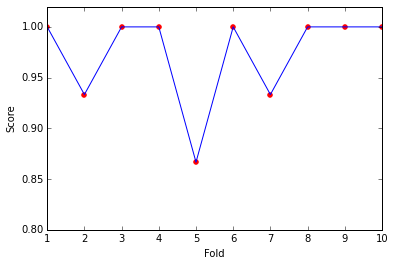

In [71]:
# Plot fold scores
folds = range(1, 11)
folds = np.array(folds)

plt.xlabel('Fold')
plt.ylabel('Score')
plt.ylim([0.8,1.02])
plt.xlim([1.0,10.0])

plt.scatter(folds, scores, color='red')
plt.plot(folds, scores, color='blue')
plt.show()

In [66]:
# Mean CV evaluation score
print 'Mean SVM Cross-validation Score:', scores.mean()

Mean SVM Cross-validation Score: 0.973333333333


### Digits Dataset

### Iris Dataset

In [68]:
# Build the (linear) SVM model object
clf_dig = svm.SVC(kernel='linear', C=1)

# Evaluate using 10-fold cross-validation
scores_dig = cross_validation.cross_val_score(clf_dig, digits.data, digits.target, cv=10)

# Display the individual CV scores
print 'SVM Cross-validation Scores:', scores

SVM Cross-validation Scores: [ 0.93513514  0.99453552  0.9281768   0.96111111  0.96089385  0.98882682
  0.96648045  0.97752809  0.93220339  0.96590909]


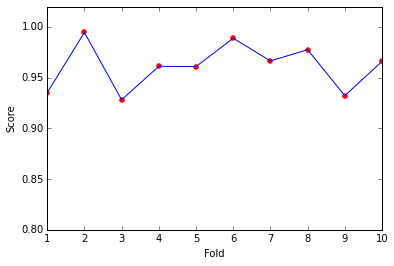

In [72]:
# Plot fold scores
folds_dig = range(1, 11)
folds_dig = np.array(folds_dig)

plt.xlabel('Fold')
plt.ylabel('Score')
plt.ylim([0.8,1.02])
plt.xlim([1.0,10.0])

plt.scatter(folds_dig, scores_dig, color='red')
plt.plot(folds_dig, scores_dig, color='blue')
plt.show()

In [69]:
# Mean CV evaluation score
print 'Mean SVM Cross-validation Score:', scores_dig.mean()

Mean SVM Cross-validation Score: 0.96108002489


## Naive Bayes

Next we look at the [Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier.

### Iris Dataset

In [73]:
# Import Naive Bayes library
from sklearn.naive_bayes import GaussianNB

# Create the Naive Bayes model object
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Check the score
nb.score(X_train, y_train)

0.96296296296296291

In [155]:
# Predict the class of test set
y_predict = nb.predict(X_test)
y_predict

array([ 1.,  2.,  2.,  0.,  1.,  1.,  2.,  1.,  0.,  0.,  0.,  2.,  1.,
        2.,  0.])

In [156]:
# The *actual* class of test set
y_test

array([ 1.,  2.,  2.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  2.,  1.,
        2.,  0.])

In [160]:
# Create the confusion matrix
conf = conf_matrix(y_test, y_predict)

# Output the confusion matrix
conf

Predicted label,0,1,2
Actual label,,,
0,5,0,0
1,0,5,1
2,0,0,4


In [162]:
# When we were wrong, how wrong were we?
# Error rate is the mean of how wrong our incorrect predictions were
err_rate = (y_predict != y_test).mean()
print('Naive Bayes Model Error Rate: %.2f' % err_rate)

Naive Bayes Model Error Rate: 0.07


### Digits Dataset

In [75]:
# Create the Naive Bayes model object
nb_dig = GaussianNB()

# Train the model
nb_dig.fit(X_dig_train, y_dig_train)

# Check the score
nb_dig.score(X_dig_train, y_dig_train)

0.83240568954854666

In [76]:
# Predict the class of test set
y_dig_predict = nb_dig.predict(X_dig_test)
y_dig_predict

array([ 8.,  6.,  1.,  7.,  4.,  1.,  7.,  7.,  0.,  1.,  5.,  6.,  8.,
        7.,  8.,  4.,  7.,  0.,  1.,  0.,  5.,  2.,  8.,  7.,  1.,  8.,
        8.,  7.,  8.,  8.,  7.,  0.,  0.,  6.,  0.,  5.,  0.,  5.,  1.,
        0.,  1.,  6.,  6.,  0.,  3.,  4.,  0.,  8.,  5.,  6.,  8.,  8.,
        4.,  8.,  5.,  2.,  7.,  5.,  5.,  1.,  1.,  8.,  9.,  0.,  8.,
        4.,  9.,  2.,  9.,  7.,  1.,  7.,  5.,  4.,  1.,  5.,  7.,  7.,
        7.,  0.,  1.,  8.,  1.,  8.,  7.,  8.,  3.,  7.,  4.,  9.,  8.,
        7.,  3.,  5.,  6.,  1.,  3.,  0.,  7.,  8.,  1.,  5.,  8.,  6.,
        1.,  7.,  0.,  8.,  8.,  4.,  2.,  0.,  7.,  2.,  4.,  9.,  0.,
        4.,  9.,  6.,  8.,  2.,  6.,  4.,  8.,  9.,  1.,  8.,  4.,  7.,
        8.,  1.,  8.,  2.,  5.,  9.,  5.,  4.,  3.,  1.,  4.,  7.,  1.,
        5.,  8.,  8.,  6.,  5.,  5.,  8.,  1.,  0.,  9.,  1.,  6.,  9.,
        8.,  7.,  1.,  5.,  6.,  3.,  6.,  5.,  2.,  7.,  6.,  2.,  4.,
        1.,  8.,  4.,  8.,  4.,  5.,  8.,  3.,  7.,  7.,  8.])

In [77]:
# The *actual* class of test set
y_dig_test

array([ 8.,  6.,  1.,  7.,  4.,  1.,  4.,  7.,  0.,  1.,  5.,  6.,  2.,
        7.,  8.,  4.,  9.,  0.,  9.,  0.,  5.,  2.,  2.,  4.,  1.,  8.,
        8.,  7.,  2.,  9.,  7.,  0.,  0.,  6.,  0.,  5.,  0.,  5.,  1.,
        0.,  8.,  6.,  6.,  0.,  3.,  4.,  0.,  3.,  5.,  6.,  9.,  8.,
        4.,  8.,  5.,  2.,  7.,  5.,  5.,  1.,  1.,  8.,  9.,  0.,  3.,
        4.,  9.,  2.,  9.,  3.,  1.,  7.,  5.,  4.,  9.,  5.,  7.,  7.,
        7.,  0.,  1.,  9.,  1.,  9.,  7.,  1.,  3.,  9.,  4.,  9.,  2.,
        5.,  3.,  5.,  6.,  2.,  3.,  0.,  7.,  3.,  2.,  5.,  2.,  6.,
        1.,  7.,  0.,  2.,  9.,  4.,  2.,  0.,  7.,  4.,  4.,  9.,  0.,
        4.,  9.,  6.,  8.,  2.,  6.,  4.,  4.,  9.,  1.,  2.,  4.,  7.,
        8.,  8.,  2.,  2.,  5.,  9.,  5.,  4.,  3.,  1.,  4.,  7.,  1.,
        5.,  3.,  8.,  6.,  5.,  5.,  2.,  1.,  0.,  9.,  1.,  6.,  9.,
        3.,  7.,  4.,  5.,  6.,  3.,  6.,  5.,  2.,  7.,  6.,  3.,  4.,
        1.,  1.,  4.,  8.,  4.,  5.,  3.,  3.,  7.,  7.,  8.])

In [78]:
# Create the confusion matrix
conf_dig = conf_matrix(y_dig_test, y_dig_predict)

# Output the confusion matrix
conf_dig

Predicted label,0,1,2,3,4,5,6,7,8,9
Actual label,,,,,,,,,,
0,17,0,0,0,0,0,0,0,0,0
1,0,17,0,0,0,0,0,0,2,0
2,0,2,7,0,0,0,0,0,9,0
3,0,0,1,7,0,0,0,1,6,0
4,0,1,1,0,17,0,0,2,1,0
5,0,0,0,0,0,20,0,1,0,0
6,0,0,0,0,0,0,15,0,0,0
7,0,0,0,0,0,0,0,20,0,0
8,0,2,0,0,0,0,0,0,12,0


In [81]:
# When we were wrong, how wrong were we?
# Error rate is the mean of how wrong our incorrect predictions were
err_rate_dig_nb = (y_dig_predict != y_dig_test).mean()
print('Naive Bayes Model Error Rate: %.2f' % err_rate_dig_nb)

Naive Bayes Model Error Rate: 0.21


## _k_-nearest Neighbors

The next classifier is [k-nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

### Iris Dataset

In [82]:
# Import k-nearest neighbors library
from sklearn.neighbors import KNeighborsClassifier

# Create the knn model object with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Check the score
knn.score(X_train, y_train)

0.97037037037037033

In [83]:
# Predict the class of test set
y_predict = knn.predict(X_test)
y_predict

array([ 1.,  2.,  2.,  0.,  1.,  1.,  2.,  1.,  0.,  0.,  0.,  2.,  1.,
        2.,  0.])

In [84]:
# The *actual* class of test set
y_test

array([ 1.,  2.,  2.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  2.,  1.,
        2.,  0.])

In [85]:
# Create the confusion matrix
conf = conf_matrix(y_test, y_predict)

# Output the confusion matrix
conf

Predicted label,0,1,2
Actual label,,,
0,5,0,0
1,0,5,1
2,0,0,4


In [86]:
# When we were wrong, how wrong were we?
# Error rate is the mean of how wrong our incorrect predictions were
err_rate = (y_predict != y_test).mean()
print('Naive Bayes Model Error Rate: %.2f' % err_rate)

Naive Bayes Model Error Rate: 0.07


Let's try running KNN with K values 1 to 10, measuring testing accuracy for each K and plotting results.

Inspiration: https://github.com/justmarkham/scikit-learn-videos/blob/master/05_model_evaluation.ipynb

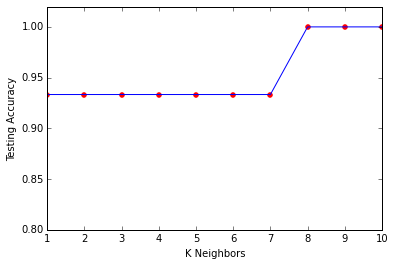

In [87]:
# Import metrics library
from sklearn import metrics

# Increase k from 1 to 10
k_range = range(1, 11)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_predict))

# Plot results
plt.plot(k_range, scores, color='blue')
plt.scatter(k_range, scores, color='red')

plt.ylim([0.8,1.02])
plt.xlim([1.0,10.0])
plt.xlabel('K Neighbors')
plt.ylabel('Testing Accuracy')

plt.show()

### Digits Dataset

In [88]:
# Create the knn model object with 5 neighbors
knn_dig = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_dig.fit(X_dig_train, y_dig_train)

# Check the score
knn_dig.score(X_dig_train, y_dig_train)

0.99010513296227587

In [93]:
# Predict the class of test set
y_dig_predict = knn_dig.predict(X_dig_test)
y_dig_predict

array([ 8.,  6.,  1.,  7.,  4.,  1.,  4.,  7.,  0.,  1.,  5.,  6.,  2.,
        7.,  8.,  4.,  9.,  0.,  9.,  0.,  5.,  2.,  2.,  4.,  1.,  8.,
        8.,  7.,  2.,  9.,  7.,  0.,  0.,  6.,  0.,  5.,  0.,  5.,  1.,
        0.,  8.,  6.,  6.,  0.,  3.,  4.,  0.,  3.,  5.,  6.,  9.,  8.,
        4.,  8.,  5.,  2.,  7.,  5.,  5.,  1.,  1.,  8.,  9.,  0.,  3.,
        4.,  9.,  2.,  9.,  7.,  1.,  7.,  5.,  4.,  9.,  5.,  7.,  7.,
        7.,  0.,  1.,  9.,  1.,  9.,  7.,  1.,  3.,  9.,  4.,  9.,  2.,
        5.,  3.,  5.,  6.,  2.,  3.,  0.,  7.,  3.,  2.,  5.,  2.,  6.,
        1.,  7.,  0.,  2.,  9.,  4.,  2.,  0.,  7.,  4.,  4.,  9.,  0.,
        4.,  9.,  6.,  8.,  2.,  6.,  4.,  4.,  9.,  1.,  2.,  4.,  7.,
        8.,  8.,  2.,  2.,  5.,  9.,  5.,  4.,  3.,  1.,  4.,  7.,  1.,
        5.,  3.,  8.,  6.,  5.,  5.,  2.,  1.,  0.,  9.,  1.,  6.,  9.,
        3.,  7.,  4.,  5.,  6.,  3.,  6.,  5.,  2.,  7.,  6.,  3.,  4.,
        1.,  1.,  4.,  8.,  4.,  5.,  3.,  3.,  7.,  7.,  8.])

In [94]:
# The *actual* class of test set
y_dig_test

array([ 8.,  6.,  1.,  7.,  4.,  1.,  4.,  7.,  0.,  1.,  5.,  6.,  2.,
        7.,  8.,  4.,  9.,  0.,  9.,  0.,  5.,  2.,  2.,  4.,  1.,  8.,
        8.,  7.,  2.,  9.,  7.,  0.,  0.,  6.,  0.,  5.,  0.,  5.,  1.,
        0.,  8.,  6.,  6.,  0.,  3.,  4.,  0.,  3.,  5.,  6.,  9.,  8.,
        4.,  8.,  5.,  2.,  7.,  5.,  5.,  1.,  1.,  8.,  9.,  0.,  3.,
        4.,  9.,  2.,  9.,  3.,  1.,  7.,  5.,  4.,  9.,  5.,  7.,  7.,
        7.,  0.,  1.,  9.,  1.,  9.,  7.,  1.,  3.,  9.,  4.,  9.,  2.,
        5.,  3.,  5.,  6.,  2.,  3.,  0.,  7.,  3.,  2.,  5.,  2.,  6.,
        1.,  7.,  0.,  2.,  9.,  4.,  2.,  0.,  7.,  4.,  4.,  9.,  0.,
        4.,  9.,  6.,  8.,  2.,  6.,  4.,  4.,  9.,  1.,  2.,  4.,  7.,
        8.,  8.,  2.,  2.,  5.,  9.,  5.,  4.,  3.,  1.,  4.,  7.,  1.,
        5.,  3.,  8.,  6.,  5.,  5.,  2.,  1.,  0.,  9.,  1.,  6.,  9.,
        3.,  7.,  4.,  5.,  6.,  3.,  6.,  5.,  2.,  7.,  6.,  3.,  4.,
        1.,  1.,  4.,  8.,  4.,  5.,  3.,  3.,  7.,  7.,  8.])

In [95]:
# Create the confusion matrix
conf_dig = conf_matrix(y_dig_test, y_dig_predict)

# Output the confusion matrix
conf_dig

Predicted label,0,1,2,3,4,5,6,7,8,9
Actual label,,,,,,,,,,
0,17,0,0,0,0,0,0,0,0,0
1,0,19,0,0,0,0,0,0,0,0
2,0,0,18,0,0,0,0,0,0,0
3,0,0,0,14,0,0,0,1,0,0
4,0,0,0,0,22,0,0,0,0,0
5,0,0,0,0,0,21,0,0,0,0
6,0,0,0,0,0,0,15,0,0,0
7,0,0,0,0,0,0,0,20,0,0
8,0,0,0,0,0,0,0,0,14,0


In [96]:
# When we were wrong, how wrong were we?
# Error rate is the mean of how wrong our incorrect predictions were
err_rate_dig_nb = (y_dig_predict != y_dig_test).mean()
print('Naive Bayes Model Error Rate: %.2f' % err_rate_dig_nb)

Naive Bayes Model Error Rate: 0.01


Let's try running KNN with K values 1 to 10, measuring testing accuracy for each K and plotting results.

Inspiration: https://github.com/justmarkham/scikit-learn-videos/blob/master/05_model_evaluation.ipynb

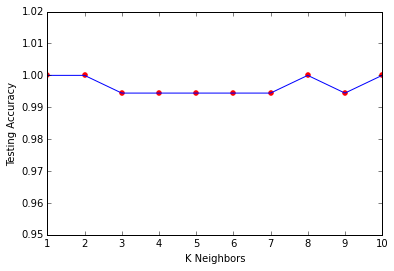

In [100]:
# Import metrics library
from sklearn import metrics

# Increase k from 1 to 10
k_range = range(1, 11)
scores_dig = []
for k in k_range:
    knn_dig = KNeighborsClassifier(n_neighbors=k)
    knn_dig.fit(X_dig_train, y_dig_train)
    y_dig_predict = knn_dig.predict(X_dig_test)
    scores_dig.append(metrics.accuracy_score(y_dig_test, y_dig_predict))

# Plot results
plt.plot(k_range, scores_dig, color='blue')
plt.scatter(k_range, scores_dig, color='red')

plt.ylim([0.95,1.02])
plt.xlim([1.0,10.0])
plt.xlabel('K Neighbors')
plt.ylabel('Testing Accuracy')

plt.show()

## Random Forests

Finally, we will consider the [Random Forests](https://en.wikipedia.org/wiki/Random_forest) ensemble classifier.

In [101]:
# Import the Random Forests library
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model object with 5 neighbors
rf = RandomForestClassifier()

# Evaluate using 10-fold cross-validation
scores = cross_validation.cross_val_score(rf, iris.data, iris.target, cv=10)

# Display the individual CV scores
print 'Random Forest Cross-validation Scores:', scores

Random Forest Cross-validation Scores: [ 1.          0.93333333  1.          0.93333333  0.93333333  1.
  0.86666667  0.93333333  1.          1.        ]


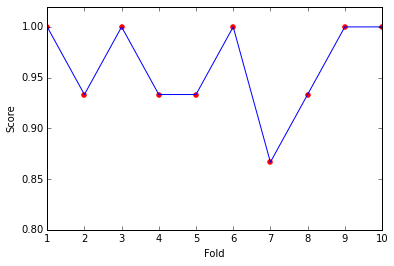

In [102]:
# Plot fold scores
folds = range(1, 11)
folds = np.array(folds)

plt.xlabel('Fold')
plt.ylabel('Score')
plt.ylim([0.8,1.02])
plt.xlim([1.0,10.0])

plt.scatter(folds, scores, color='red')
plt.plot(folds, scores, color='blue')
plt.show()

In [103]:
# Mean CV evaluation score
print 'Mean SVM Cross-validation Score:', scores.mean()

Mean SVM Cross-validation Score: 0.96


### Digits Dataset

In [105]:
# Create the Random Forest model object with 5 neighbors
rf_dig = RandomForestClassifier()

# Evaluate using 10-fold cross-validation
scores_dig = cross_validation.cross_val_score(rf_dig, digits.data, digits.target, cv=10)

# Display the individual CV scores
print 'Random Forest Cross-validation Scores:', scores_dig

Random Forest Cross-validation Scores: [ 0.85405405  0.94535519  0.91160221  0.89444444  0.91061453  0.95530726
  0.93854749  0.9494382   0.91525424  0.90340909]


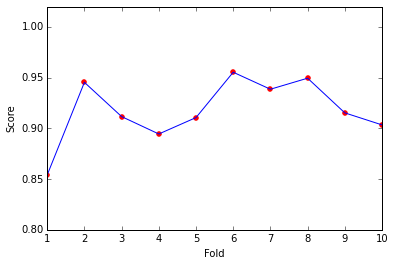

In [106]:
# Plot fold scores
folds_dig = range(1, 11)
folds_dig = np.array(folds)

plt.xlabel('Fold')
plt.ylabel('Score')
plt.ylim([0.8,1.02])
plt.xlim([1.0,10.0])

plt.scatter(folds_dig, scores_dig, color='red')
plt.plot(folds_dig, scores_dig, color='blue')
plt.show()

In [107]:
# Mean CV evaluation score
print 'Mean SVM Cross-validation Score:', scores_dig.mean()

Mean SVM Cross-validation Score: 0.917802670389


And that's it.

If you are interested, you could go back and change code to better evaluate the accuracy (relative and absolute) of the models, but I'll leave that for another time.

Cheers!